In [ ]:
import seaborn as sns

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
df = sns.load_dataset('taxis')

In [ ]:
df.nunique()

pickup             6414
dropoff            6425
passengers            7
distance           1079
fare                220
tip                 489
tolls                16
total               898
color                 2
payment               2
pickup_zone         194
dropoff_zone        203
pickup_borough        4
dropoff_borough       5
dtype: int64

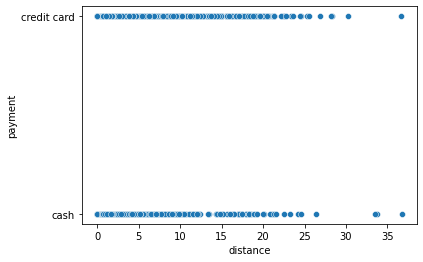

In [ ]:
sns.scatterplot(x='distance', y='payment', data=df)

In [ ]:
df.corr()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


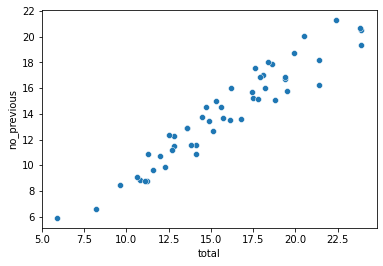

In [ ]:
sns.scatterplot(x='total', y='no_previous', data=df)

In [ ]:
Y = df['total'].values

In [ ]:
Y.shape

(51,)

In [ ]:
Y = Y[:, None]

In [ ]:
Y.shape

(51, 1)

In [ ]:
X = df['alcohol'].values

In [ ]:
X.shape

(51,)

In [ ]:
import numpy as np

In [ ]:
ones = np.ones(len(X))

In [ ]:
ones.shape

(51,)

In [ ]:
X_ = np.vstack((X, ones)).T

In [ ]:
X_.shape

(51, 2)

In [ ]:
R = np.linalg.inv(X_.T @ X_) @ X_.T @ Y

In [ ]:
R

array([[-0.20857159],
       [ 4.46368788],
       [-0.43067562]])

In [ ]:
def plotR(minX, maxX, R):
  x = np.linspace(minX, maxX, 2)
  ones = np.ones(len(x))
  x = np.vstack((x, ones)).T
  plt.plot(x[:, 0], x @ R, 'r')

In [ ]:
def plotR2(minX, maxX, R):
  x = np.linspace(minX, maxX, 100)
  ones = np.ones(len(x))
  x = np.vstack((x**2, x, ones)).T
  plt.plot(x[:, 1], x @ R, 'r')

In [ ]:
import matplotlib.pyplot as plt

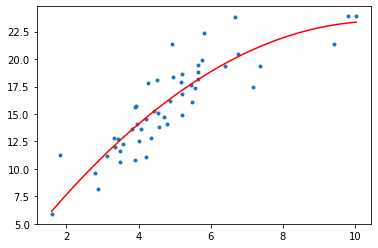

In [ ]:
plt.plot(X, Y, '.')
plotR2(X.min(), X.max(), R)

In [ ]:
X_ = np.hstack(((X**2)[:, None], X_))

In [ ]:
df = sns.load_dataset('titanic')

In [ ]:
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

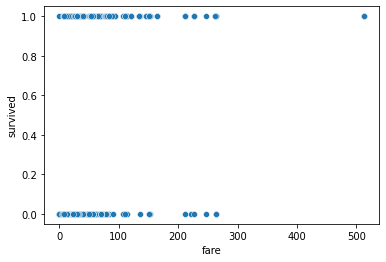

In [ ]:
sns.scatterplot(x='fare', y='survived', data=df)

In [ ]:
hours = '0.50	0.75	1.00	1.25	1.50	1.75	1.75	2.00	2.25	2.50	2.75	3.00	3.25	3.50	4.00	4.25	4.50	4.75	5.00	5.50'
passes = '0	0	0	0	0	0	1	0	1	0	1	0	1	0	1	1	1	1	1	1'

In [ ]:
hours = [float(h) for h in hours.split('\t')]
passes = [float(h) for h in passes.split('\t')]

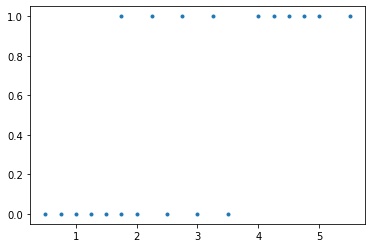

In [ ]:
plt.plot(hours, passes, '.')

In [ ]:
X = np.array(hours)
Y = np.array(passes)

In [ ]:
ones = np.ones(len(X))
X_ = np.vstack((X, ones)).T
R = np.linalg.inv(X_.T @ X_) @ X_.T @ Y
R

array([ 0.23459561, -0.15393527])

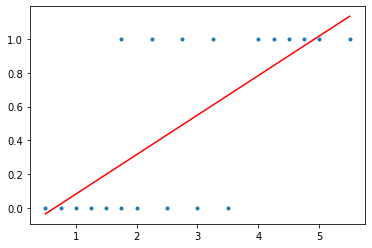

In [ ]:
plt.plot(hours, passes, '.')
plotR(X.min(), X.max(), R)

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

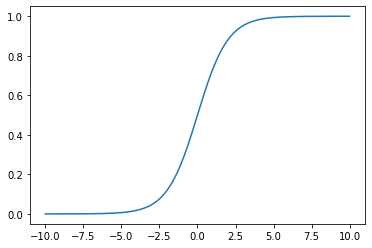

In [ ]:
x = np.linspace(-10, 10, 1000)
y = sigmoid(x)
plt.plot(x, y)

In [ ]:
w = np.random.randn()
b = np.random.randn()

In [ ]:
A = w*X + b

In [ ]:
Y

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1.])

In [ ]:
P = sigmoid(A)

In [ ]:
P

array([0.9456266 , 0.93196941, 0.91518954, 0.89473834, 0.87005576,
       0.84061641, 0.84061641, 0.80599466, 0.76594625, 0.72049756,
       0.67002558, 0.61530578, 0.55750452, 0.49810254, 0.38110745,
       0.32662701, 0.27645579, 0.23134343, 0.19164275, 0.12823766])

In [ ]:
def loss(P):
  L = 0
  for y, p in zip(Y, P):
    L += y * np.log(p + np.finfo(float).eps) + (1-y) * np.log(1-p + np.finfo(float).eps)
  return L

In [ ]:
loss(w, b, P)

-27.610222237963924

In [ ]:
def update(w, b, lr=0.01):
  dw = 0
  db = 0
  for x, y, p in zip(X, Y, P):
    dw += x * (p - y)
    db += (p - y)
  w -= lr * dw
  b -= lr * db
  return w, b

In [ ]:
w, b = update(w, b)

In [ ]:
w, b

(-0.842041263096913, 3.3091571069450603)

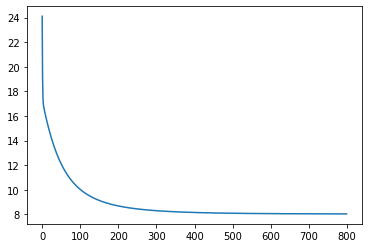

In [ ]:
w = np.random.randn()
b = np.random.randn()
l = []
for epoch in range(800):
  A = w*X + b
  P = sigmoid(A)
  l.append(-loss(w, b, P))
  #print(epoch, l[-1])
  w, b = update(w, b, lr=0.01)
plt.plot(l)

In [ ]:
w, b

(1.4273125928066548, -3.84876008118027)

In [ ]:
A = w*X + b
P = sigmoid(A)

In [ ]:
P

array([0.04168226, 0.05850947, 0.08155177, 0.11258349, 0.15345043,
       0.20571297, 0.20571297, 0.27009613, 0.34585561, 0.43033645,
       0.51907812, 0.60663222, 0.68783259, 0.75893216, 0.86535409,
       0.90179397, 0.92917905, 0.94935656, 0.964008  , 0.98203954])

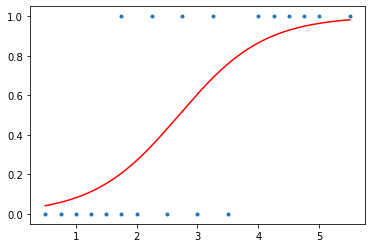

In [ ]:
plt.plot(X, Y, '.')
XX = np.linspace(X.min(), X.max(), 1000)
A = w*XX + b
P = sigmoid(A)
plt.plot(XX, P, 'r')

In [ ]:
df = sns.load_dataset('titanic')

In [ ]:
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df = df.dropna()

In [ ]:
X = df[['age', 'fare']].values
Y = df['survived'].values

In [ ]:
w

array([ 39.57910673, 102.50699977])

In [ ]:
def update2(w, b, lr=0.01):
  dw1 = 0
  dw2 = 0
  db = 0
  for x, y, p in zip(X, Y, P):
    dw1 += x[0] * (p - y)
    dw2 += x[1] * (p - y)
    db += (p - y)
  w[0] = w[0] - lr * dw1
  w[1] = w[1] - lr * dw2
  b -= lr * db
  return w, b

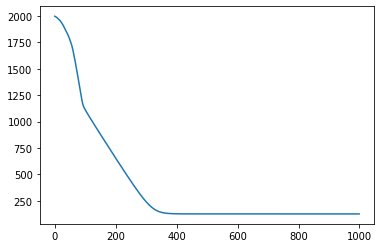

In [ ]:
w = np.random.randn(2) # age, fare
b = np.random.randn()

l = []
for epoch in range(1000):
  P = sigmoid(np.sum(X * w, axis=1)  + b)
  #print(P)
  l.append(-loss(P))
  #print(epoch, l[-1])
  w, b = update2(w, b, lr=0.000001)
plt.plot(l)

In [ ]:
w,b 

(array([0.0190981 , 0.01318271]), -1.172190060366437)

In [ ]:
df = sns.load_dataset('iris')

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [ ]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
itrain = np.r_[:25, 50:75, 100:125]
itest = np.r_[25:50, 75:100, 125:150]

In [ ]:
X = df.iloc[:, :4].values

In [ ]:
Y = df.iloc[:, -1].values

In [ ]:
Xtrain = X[itrain]
Xtest = X[itest]
Ytrain = Y[itrain]
Ytest = Y[itest]

In [ ]:
def NN(x):
  return Ytrain[np.sum((Xtrain - x) ** 2, axis=1).argmin()]

In [ ]:
z = []
for x in Xtest:
  z.append(NN(x))
z = np.array(z)

In [ ]:
np.sum(z == Ytest) / len(z) * 100

94.66666666666667

# K-means

In [ ]:
import seaborn as sns

In [ ]:
df = sns.load_dataset('iris')

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
X = df.iloc[:, :-1].values

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
K = 3
C = X[np.random.permutation(len(X))[:K]]

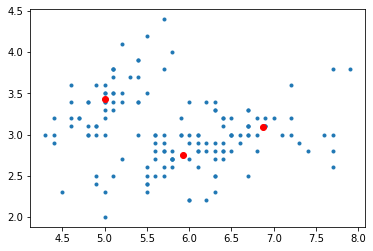

In [ ]:
plt.plot(X[:, 0], X[:, 1], '.')
plt.plot(C[:, 0], C[:, 1], 'or')
plt.show()

In [ ]:
D = np.zeros((K, len(X)))
for k in range(K):
  D[k] = np.sum((X - C[k]) ** 2, axis=1)

In [ ]:
idx = D.argmin(axis=0)

In [ ]:
for k in range(K):
  C[k] = X[idx == k].mean(axis=0)

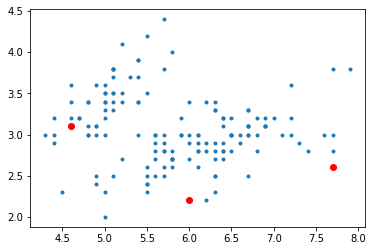

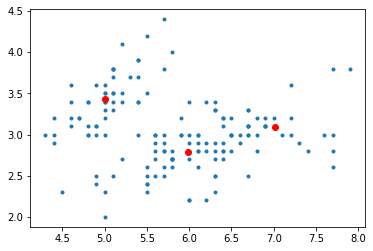

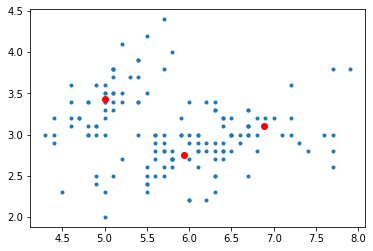

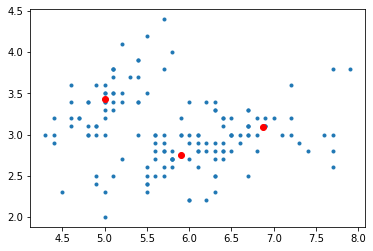

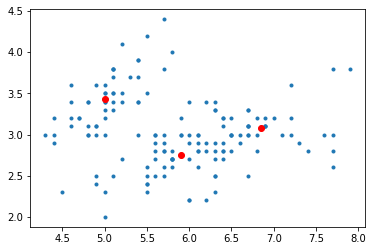

In [ ]:
K = 3
C = X[np.random.permutation(len(X))[:K]]
while True:
  # data visualization
  plt.plot(X[:, 0], X[:, 1], '.')
  plt.plot(C[:, 0], C[:, 1], 'or')
  plt.show()

  # distance
  D = np.zeros((K, len(X)))
  for k in range(K):
    D[k] = np.sum((X - C[k]) ** 2, axis=1)
  idx = D.argmin(axis=0)

  # update centroids
  Cold = C.copy() 
  for k in range(K):
    C[k] = X[idx == k].mean(axis=0)

  # check terminate condition
  if np.sum(np.abs(Cold - C)) == 0:
    break

In [ ]:
C

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [ ]:
idx

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [ ]:
classes = list(df.iloc[:, -1].unique())

In [ ]:
Y = df.iloc[:, -1].values
for cls in classes:
  Y[Y == cls] = classes.index(cls)

In [ ]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=object)

In [ ]:
C_actual = np.zeros((K, X.shape[1]))
for k in range(K):
  C_actual[k] = X[Y == k].mean(axis=0)

In [ ]:
C_actual

array([[5.006, 3.428, 1.462, 0.246],
       [5.936, 2.77 , 4.26 , 1.326],
       [6.588, 2.974, 5.552, 2.026]])

In [ ]:
C

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [ ]:
to_actual = {}
for k in range(K):
  to_actual[k] = np.sum((C_actual - C[k]) ** 2, axis=1).argmin()

In [ ]:
idx_actual = idx.copy()

In [ ]:
for k, v in to_actual.items():
  i = idx == k
  idx_actual[i] = v

In [ ]:
idx

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [ ]:
idx_actual

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [ ]:
np.sum(Y == idx_actual) / len(Y)

0.8933333333333333

# Wine

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


split train test 

*  class 1: train 30 test 29
*  class 2: train 36 test 35
*  class 3: train 24 test 24

1.   k-NN (vary K) plot accuracy
2.   k-means (vary K) accuracy (K=3)



In [ ]:
np.unique(df.iloc[:, 0].values, return_counts=True)

(array([1, 2, 3]), array([59, 71, 48]))

In [ ]:
itrain = np.r_[0:30, 59:(59+36), (59+36+35):(59+36+35+24)]

In [ ]:
all_i = list(range(len(X)))
itest = np.array(list(set(all_i) - set(itrain)))

In [ ]:
X = df.iloc[:, 1:].values
Y = df.iloc[:, 0].values

In [ ]:
Xtrain = X[itrain]
Xtest = X[itest]
Ytrain = Y[itrain]
Ytest = Y[itest]

In [ ]:
xtrain.shape

(90, 13)

In [ ]:
xtest.shape

(88, 13)

In [ ]:
z = []
for x in Xtest: 
  z.append(NN(x))

In [ ]:
np.sum(z == Ytest) / len(Ytest) * 100

71.5909090909091

In [ ]:
labels, F = np.unique([1, 2, 2, 1, 2, 3], return_counts=True)

In [ ]:
labels[F.argmax()]

2

# GA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

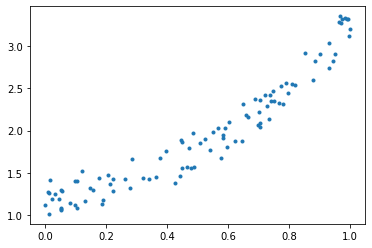

In [ ]:
x = np.random.rand(100)
noise = 0.5 * np.random.rand(100)
y = 2*x ** 2 + 1 + noise  # [2, 0, 1]
plt.plot(x, y, '.')

In [ ]:
n_pop = 100
pop = np.random.randn(n_pop, 3)
pop

In [ ]:
def fitness(pop):
  # lower is better
  F = []
  for p in pop:
    z = np.polyval(p, x)
    F.append(np.mean(np.abs(y - z)))
  return np.array(F)

In [ ]:
def mutate(p):
  i = np.random.randint(len(p))
  p[i] += np.random.randn() 
  return p

In [ ]:
for gen in range(100):
  F = fitness(pop)
  idx = F.argsort()
  print(f'gen: {gen}: fitness = {F[idx[0]]}')
  pop = pop[idx]
  # selection (keep 50%) and reproduction (50%)
  for i in range(50, n_pop):
    pop[i] = mutate(pop[i])

gen: 0: fitness = 0.1479994563165819
gen: 1: fitness = 0.1479994563165819
gen: 2: fitness = 0.1479994563165819
gen: 3: fitness = 0.1479994563165819
gen: 4: fitness = 0.1479994563165819
gen: 5: fitness = 0.1479994563165819
gen: 6: fitness = 0.1479994563165819
gen: 7: fitness = 0.1479994563165819
gen: 8: fitness = 0.1479994563165819
gen: 9: fitness = 0.1479994563165819
gen: 10: fitness = 0.1479994563165819
gen: 11: fitness = 0.1479994563165819
gen: 12: fitness = 0.1479994563165819
gen: 13: fitness = 0.1479994563165819
gen: 14: fitness = 0.1479994563165819
gen: 15: fitness = 0.1479994563165819
gen: 16: fitness = 0.1479994563165819
gen: 17: fitness = 0.1479994563165819
gen: 18: fitness = 0.1479994563165819
gen: 19: fitness = 0.1479994563165819
gen: 20: fitness = 0.1479994563165819
gen: 21: fitness = 0.1479994563165819
gen: 22: fitness = 0.1479994563165819
gen: 23: fitness = 0.1479994563165819
gen: 24: fitness = 0.1479994563165819
gen: 25: fitness = 0.1479994563165819
gen: 26: fitness = 0.1

In [ ]:
pop[0]

array([0.95951691, 0.77755766, 1.25324881])

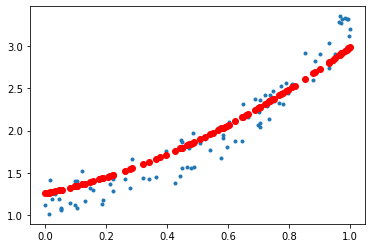

In [ ]:
z = np.polyval(pop[0], x)
plt.plot(x, y, '.')
plt.plot(x, z, 'or')

## TSP

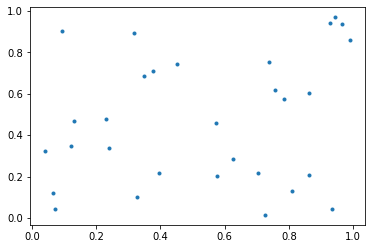

In [ ]:
n_cities = 30
cities = np.random.rand(n_cities, 2)
plt.plot(cities[:, 0], cities[:, 1], '.')

In [ ]:
n_pop = 100
pop = []
for i in range(n_pop):
   pop.append(np.random.permutation(n_cities))
pop = np.array(pop)

In [ ]:
pop

array([[21,  7, 14, ..., 11, 12, 23],
       [28,  0, 25, ..., 24, 10, 19],
       [ 8, 22,  4, ..., 25, 21,  1],
       ...,
       [ 2,  1, 29, ...,  9, 11, 15],
       [11,  8,  2, ..., 22,  5, 26],
       [17, 18,  7, ..., 13,  1, 29]])

In [ ]:
def fitness(pop):
  F = []
  for p in pop:
    s = 0
    for i in range(len(p)):
      j = i + 1 if i + 1 < len(p) else 0
      s += np.sqrt(np.sum((cities[p][i] - cities[p][j]) ** 2)) 
    F.append(s)
  return np.array(F)

In [ ]:
def mutate(p):
  i, j = np.random.permutation(len(p))[:2]
  p[[i, j]] = p[[j, i]]
  return p

In [ ]:
for gen in range(100):
  F = fitness(pop)
  idx = F.argsort()
  pop = pop[idx]
  print(f'gen: {gen}, fitness = {F[idx[0]]}')
  for p in pop[n_pop//2:]:
    # TODO crossover
    p = mutate(p)

gen: 0, fitness = 14.323057028645826
gen: 1, fitness = 14.323057028645826
gen: 2, fitness = 14.323057028645826
gen: 3, fitness = 14.323057028645826
gen: 4, fitness = 14.323057028645826
gen: 5, fitness = 14.323057028645826
gen: 6, fitness = 14.323057028645826
gen: 7, fitness = 14.323057028645826
gen: 8, fitness = 14.323057028645826
gen: 9, fitness = 14.323057028645826
gen: 10, fitness = 14.323057028645826
gen: 11, fitness = 14.323057028645826
gen: 12, fitness = 14.323057028645826
gen: 13, fitness = 14.323057028645826
gen: 14, fitness = 14.323057028645826
gen: 15, fitness = 14.323057028645826
gen: 16, fitness = 14.01541894718517
gen: 17, fitness = 14.01541894718517
gen: 18, fitness = 14.01541894718517
gen: 19, fitness = 14.01541894718517
gen: 20, fitness = 14.01541894718517
gen: 21, fitness = 14.01541894718517
gen: 22, fitness = 14.01541894718517
gen: 23, fitness = 14.01541894718517
gen: 24, fitness = 14.01541894718517
gen: 25, fitness = 14.01541894718517
gen: 26, fitness = 14.0154189471

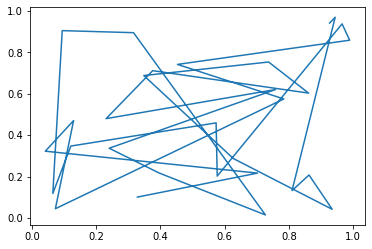

In [ ]:
plt.plot(cities[pop[0]][:, 0], cities[pop[0]][:, 1])

HW

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('HR.csv')
df

,gender,department,weight,height,age
0,Male,R,89,172,32
1,Male,R,89,180,52
2,Male,R,52,158,27
3,Male,R,50,157,39
4,Male,R,68,174,25
...,...,...,...,...,...
353,Female,J,73,168,38
354,Female,J,68,169,59
355,Female,J,49,155,33
356,Female,J,101,187,60


In [ ]:
df.describe()

,weight,height,age
count,358.000000,358.000000,358.000000
mean,72.108939,167.918994,41.237430
std,14.528707,9.558115,10.983412
min,38.000000,142.000000,22.000000
25%,61.000000,161.000000,32.000000
50%,70.000000,168.000000,41.000000
75%,84.000000,175.000000,51.000000
max,106.000000,195.000000,60.000000


# Perceptron

In [ ]:
import numpy as np

In [ ]:
# AND
X = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]])
Y = np.array([1, -1, -1, -1])

In [ ]:
# OR
X = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]])
Y = np.array([1, 1, 1, -1])

In [ ]:
# XOR
X = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]])
Y = np.array([-1, 1, 1, -1])

In [ ]:
X_ = np.hstack((X, np.ones((len(X), 1), dtype=int)))
X_

array([[ 1,  1,  1],
       [ 1, -1,  1],
       [-1,  1,  1],
       [-1, -1,  1]])

In [ ]:
for i in range(len(Y)):
  print(X_[i] * Y[i])

[-1 -1 -1]
[ 1 -1  1]
[-1  1  1]
[ 1  1 -1]


In [ ]:
i = np.random.randint(len(X))
W = X_[i] * Y[i]
print(W)

[-1  1  1]


In [ ]:
all_pass = False
while not all_pass:
  all_pass = True
  for i in range(len(X_)):
    x = X_[i] * Y[i]
    p = np.dot(W, x)
    print(p)
    if p < 0:
      all_pass = False
      W = W + x
      print(W)
      break

-1
[-2  0  0]
2
-2
[-1 -1  1]
1
1
1
-3
[0 0 0]
0
0
0
0


In [ ]:
z = np.sign(X_ @ W[:, None]).flatten()

In [ ]:
np.sum(z == Y) / len(Y) * 100

0.0

# MLP

In [ ]:
import seaborn as sns
df = sns.load_dataset('iris')

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
X = df.iloc[:, :-1].values

In [ ]:
X.shape

(150, 4)

In [ ]:
y = df.iloc[:, -1].values

In [ ]:
np.unique(y)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
def onehotencoder(y):
  labels = list(np.unique(y))
  Y = np.zeros((len(y), len(labels)))
  for i in range(len(y)):
    Y[i, labels.index(y[i])] = 1
  return Y, labels

In [ ]:
Y, labels = onehotencoder(y)
Y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

(4) -> 10 -> 20 -> 10 -> (3)
* W1 = 4+1 -> 10
* W2 = 10+1 -> 20
* W3 = 20+1 -> 10
* W4 = 10+1 -> 3

In [ ]:
h = [10, 20, 10]
h = [X.shape[1]] + h + [len(labels)]
h

[4, 10, 20, 10, 3]

In [ ]:
W = []
for i in range(len(h) - 1):
  W.append(np.random.rand(h[i]+1, h[i+1]))

In [ ]:
for w in W:
  print(w.shape)

(5, 10)
(11, 20)
(21, 10)
(11, 3)


In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

## forward

In [ ]:
def aug_one(X):
  return np.hstack((X, np.ones((len(X), 1))))

In [ ]:
h1 = sigmoid(aug_one(X) @ W[0])

In [ ]:
h2 = sigmoid(aug_one(h1) @ W[1])
h2.shape

(150, 20)

In [ ]:
h3 = sigmoid(aug_one(h2) @ W[2])
h3.shape

(150, 10)

In [ ]:
h4 = sigmoid(aug_one(h3) @ W[3])
h4.shape

(150, 3)

In [ ]:
X_ = X.copy()

In [ ]:
X = X_.copy()
input = [X]
for i in range(len(W)):
  input.append(sigmoid(aug_one(input[i]) @ W[i]))

In [ ]:
len(input)

5

In [ ]:
for i in input:
  print(i.shape)

(150, 4)
(150, 10)
(150, 20)
(150, 10)
(150, 3)


In [ ]:
labels

['setosa', 'versicolor', 'virginica']

In [ ]:
[labels[i] for i in X.argmax(axis=1)]

## backward

In [ ]:
lr = 0.1

In [ ]:
e = Y - input[-1]

In [ ]:
e.shape

(150, 3)

delta

In [ ]:
delta = input[-1] * (1 - input[-1]) * (Y - input[-1])

In [ ]:
delta.shape

(150, 3)

In [ ]:
input[-2].shape

(150, 10)

In [ ]:
W[-1].shape

(11, 3)

update w

In [ ]:
dW = lr * aug_one(input[-2]).T @ delta

In [ ]:
dW.shape

(11, 3)

In [ ]:
W[-1] = W[-1] + dW

delta

In [ ]:
Oh = aug_one(input[-2])
delta_h = Oh * (1 - Oh) * (delta @ W[-1].T)

In [ ]:
delta_h.shape

(150, 11)

In [ ]:
W[-2].shape

(21, 10)

In [ ]:
delta_h[:, :-1].shape

(150, 10)

update w

In [ ]:
dW = lr * aug_one(input[-3]).T @ delta_h[:, :-1]

In [ ]:
dW.shape

(21, 10)

In [ ]:
W[-2] = W[-2] + dW

delta

In [ ]:
Oh = aug_one(input[-3])
delta = delta_h[:, :-1]
delta_h = Oh * (1 - Oh) * (delta @ W[-2].T)

In [ ]:
delta_h.shape

(150, 21)

In [ ]:
W[-3].shape

(11, 20)

In [ ]:
delta_h[:, :-1].shape

(150, 20)

update w

In [ ]:
dW = lr * aug_one(input[-4]).T @ delta_h[:, :-1]

In [ ]:
dW.shape

(11, 20)

In [ ]:
W[-3] = W[-3] + dW

delta

In [ ]:
Oh = aug_one(input[-4])
delta = delta_h[:, :-1]
delta_h = Oh * (1 - Oh) * (delta @ W[-3].T)

In [ ]:
delta_h.shape

(150, 11)

In [ ]:
W[-4].shape

(5, 10)

In [ ]:
delta_h[:, :-1].shape

(150, 10)

update w

In [ ]:
dW = lr * aug_one(input[-5]).T @ delta_h[:, :-1]

In [ ]:
dW.shape

(5, 10)

In [ ]:
W[-4] = W[-4] + dW

In [ ]:
sum([w.size for w in W])

513

backward loop

In [ ]:
lr = 0.1

# output layer
e = Y - input[-1]
delta = input[-1] * (1 - input[-1]) * (Y - input[-1])

# update w
dW = lr * aug_one(input[-2]).T @ delta
W[-1] = W[-1] + dW
print(f'update w[{-1}]')

for i in range(-1, -4, -1):
  # hidden layers
  Oh = aug_one(input[i - 1]) # -2..-4
  delta = Oh * (1 - Oh) * (delta @ W[i].T)  # -1..-3
  delta = delta[:, :-1]
  # update w
  dW = lr * aug_one(input[i - 2]).T @ delta # -3..-5
  W[i - 1] = W[i - 1] + dW #-2..-4
  print(f'update w[{i-1}]')

update w[-1]
update w[-2]
update w[-3]
update w[-4]


forward-backward

In [ ]:
def MLP(X, Y, lr=0.1, epochs=100, h=[10, 20, 10]):
  # initial weights
  h = [X.shape[1]] + h + [len(labels)]
  W = []
  for i in range(len(h) - 1):
    W.append(np.random.rand(h[i]+1, h[i+1]))

  for epoch in range(epochs):

    #===== forward
    input = [X]
    for i in range(len(W)):
      input.append(sigmoid(aug_one(input[i]) @ W[i]))

    #===== backward
    # output layer
    e = Y - input[-1]
    if epoch % 100 == 0:
      print(f'{epoch}: loss = {np.mean(e ** 2)}')
    delta = input[-1] * (1 - input[-1]) * (Y - input[-1])

    # update w
    dW = lr * aug_one(input[-2]).T @ delta
    W[-1] = W[-1] + dW
    #print(f'update w[{-1}]')

    for i in range(-1, 1 - len(h), -1):
      # hidden layers
      Oh = aug_one(input[i - 1]) # -2..-4
      delta = Oh * (1 - Oh) * (delta @ W[i].T)  # -1..-3
      delta = delta[:, :-1]
      # update w
      dW = lr * aug_one(input[i - 2]).T @ delta # -3..-5
      W[i - 1] = W[i - 1] + dW #-2..-4
      #print(f'update w[{i-1}]')
  return W

In [ ]:
def forward(W, X):
  input = X.copy()
  for i in range(len(W)):
    input = sigmoid(aug_one(input) @ W[i])
  return input

In [ ]:
itrain = np.r_[:25, 50:75, 100:125]
itest = np.r_[25:50, 75:100, 125:150]

Xtrain = X_[itrain]
Xtest = X_[itest]
Ytrain = Y[itrain]
Ytest = Y[itest]

In [ ]:
W = MLP(Xtrain, Ytrain, lr=0.01, epochs=1500)

0: loss = 0.6572322749349647
100: loss = 0.22222222871043507
200: loss = 0.22222222870415992
300: loss = 0.22222222870364033
400: loss = 0.22222222870312072
500: loss = 0.22222222870260114
600: loss = 0.22222222870208164
700: loss = 0.22222222870156208
800: loss = 0.2222222287010426
900: loss = 0.2222222287005231
1000: loss = 0.22222222870000363
1100: loss = 0.2222222286994842
1200: loss = 0.22222222869896477
1300: loss = 0.22222222869844538
1400: loss = 0.22222222869792602


In [ ]:
Ztest = forward(W, Xtest)

In [ ]:
Ztest.shape

(75, 3)

In [ ]:
Ytest.shape

(75, 3)

In [ ]:
np.sum(Ztest.argmax(axis=1) == Ytest.argmax(axis=1)) / len(Ztest)

0.3333333333333333